# EDA on Aspiring Mind Employment Outcome 2015 (AMEO)

### The main objective of this analysis is to find out how the salary is effected based on all the variables prsented to us

##### The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import re

from scipy import stats

import seaborn as sns

In [2]:
df = pd.read_excel (r'C:\Users\DELL\Desktop\DataScience\Projects\project3\aspiring_minds_2015.xlsx')

In [3]:
df.shape

(3998, 39)

In [4]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [8]:
del df["Unnamed: 0"]

In [9]:
df.set_index("ID" ,inplace=True)

In [10]:
df.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier','DOJ','DOL','CollegeTier','CollegeState'],axis=1,inplace=True)

In [11]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', 'DOB', '10percentage',
       '10board', '12graduation', '12percentage', '12board', 'Degree',
       'Specialization', 'collegeGPA', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [12]:
x=[]
for i in df['collegeGPA']:
    if i > 10:
        i = i/10
        i = "{:.2f}".format(i)
        x.append(i)
    else:
        x.append(i)
print(x)
#Converting Percentage to GPA 

['7.80', '7.01', '7.00', '7.46', '7.39', '7.63', '7.30', 8.58, '8.50', '7.80', '7.49', '7.23', '6.00', '6.00', '6.77', '6.30', '6.48', '7.47', '6.95', '7.63', '7.82', '7.40', '7.60', '5.55', '7.60', '7.80', '6.62', '7.64', '7.20', '6.80', '7.72', '7.10', '7.93', '7.43', '7.09', '6.50', '7.41', '6.39', '7.72', '7.64', '6.02', '6.60', '7.10', '7.10', '9.21', '7.90', '7.40', '7.70', '7.40', '5.75', '8.97', '5.78', '5.76', '8.00', '8.00', '6.77', '6.82', '8.08', '6.69', '5.50', '7.00', '8.50', '6.53', '6.93', '7.21', '7.00', '7.61', '7.15', '7.75', '7.00', '7.64', '6.12', '6.00', '6.70', '7.50', '7.58', '8.76', '6.32', '7.35', '7.86', '7.41', '6.94', '7.62', '5.50', '6.10', '6.31', '7.11', '6.20', '7.08', '7.99', '6.00', '7.74', '6.60', '6.60', '6.15', '8.82', '6.40', '7.01', '7.78', '8.00', '8.00', '6.67', '6.50', '7.00', '6.30', '7.20', '6.97', '6.22', '5.90', '6.70', '6.93', '7.85', '7.35', '7.00', '6.70', '7.80', '6.41', '6.19', '7.27', '7.70', '7.76', '6.20', '7.56', '6.86', '6.79', '

In [13]:
len(x)

3998

In [14]:
del df['collegeGPA']

In [15]:
df['collegeGPA'] = x

In [16]:
#Changing the dtype of collegeGPA to float from string

df.collegeGPA = df.collegeGPA.apply(lambda x :float(x))

In [17]:
dob=df['DOB']

In [18]:
doby=pd.DatetimeIndex(dob).year #Taking Year from DOB

In [19]:
doby

Int64Index([1990, 1989, 1992, 1989, 1991, 1992, 1993, 1992, 1991, 1993,
            ...
            1991, 1991, 1989, 1990, 1990, 1987, 1992, 1991, 1992, 1991],
           dtype='int64', name='DOB', length=3998)

In [20]:
del df["DOB"]

In [21]:
df["YearOfBirth"]=doby

In [22]:
df.YearOfBirth.unique()

array([1990, 1989, 1992, 1991, 1993, 1987, 1988, 1986, 1994, 1977, 1985,
       1995, 1997, 1983, 1984, 1981, 1982], dtype=int64)

In [23]:
age = []
for i in df['YearOfBirth']:
    b = 2015 - i
    age.append(b)
print(age)
#Storing Age into DataFrame

[25, 26, 23, 26, 24, 23, 22, 23, 24, 22, 26, 25, 25, 25, 23, 25, 23, 28, 23, 25, 27, 24, 23, 29, 22, 24, 27, 22, 21, 23, 26, 23, 24, 23, 26, 25, 23, 22, 24, 24, 26, 23, 24, 22, 26, 23, 24, 23, 24, 26, 27, 24, 23, 24, 23, 23, 26, 26, 25, 38, 24, 22, 24, 23, 29, 25, 26, 24, 26, 22, 23, 25, 23, 23, 24, 23, 24, 23, 22, 23, 23, 25, 28, 22, 28, 22, 28, 23, 23, 24, 24, 24, 23, 23, 25, 25, 27, 23, 27, 27, 23, 26, 26, 24, 25, 22, 22, 23, 30, 24, 26, 26, 26, 24, 28, 23, 25, 30, 25, 25, 24, 27, 22, 27, 24, 23, 23, 25, 27, 23, 23, 24, 23, 26, 23, 23, 26, 26, 24, 24, 24, 23, 22, 29, 23, 24, 23, 22, 24, 25, 24, 24, 23, 26, 28, 25, 24, 26, 23, 23, 26, 25, 24, 23, 24, 25, 26, 25, 22, 23, 25, 24, 22, 22, 24, 24, 24, 27, 26, 26, 24, 23, 23, 23, 25, 27, 26, 25, 25, 25, 24, 23, 22, 29, 26, 25, 26, 22, 25, 22, 26, 24, 25, 26, 23, 23, 22, 24, 25, 23, 28, 27, 25, 25, 23, 26, 24, 25, 25, 24, 24, 25, 26, 24, 22, 25, 25, 26, 26, 23, 23, 24, 24, 23, 27, 25, 23, 27, 24, 25, 25, 23, 27, 24, 26, 24, 22, 25, 23, 24,

In [24]:
del df['YearOfBirth']

In [25]:
type(age)

list

In [26]:
df['Age'] = age

In [27]:
df['Age'].unique()

array([25, 26, 23, 24, 22, 28, 27, 29, 21, 38, 30, 20, 18, 32, 31, 34, 33],
      dtype=int64)

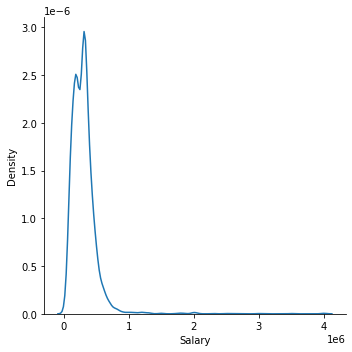

In [28]:
sns.displot(data=df,x=df.Salary,kind="kde")
plt.show()
#Seeing the Salary data spread 

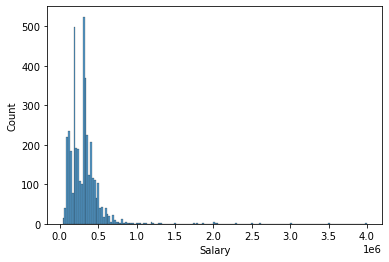

In [29]:
sns.histplot(data=df, x="Salary")
plt.show()

#### Observation
We can see that there are outliers in Salary column

##### Q-Q Plot for seeing the spread of iutliers

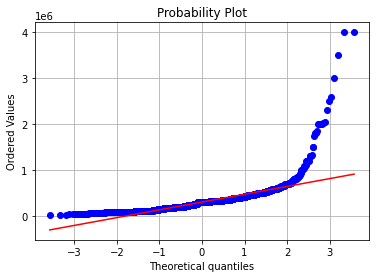

In [30]:
stats.probplot(df['Salary'], dist="norm", plot=plt)

plt.grid()

##### The Blue dots are not on the red line so we can conclude that this data had outiers

In [31]:
# x_t = tranformed by box-cox, l = Lambda

x_t, l = stats.boxcox(df['Salary'])

print(l)
#Performing Box-Cox to remove the outliers

0.04330214214353366


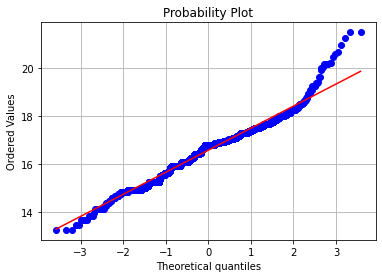

In [32]:
stats.probplot(x_t, dist="norm", plot=plt)

plt.grid()

#### We can see that there are still few outliers

In [33]:
min_threshold , max_threshold = df.Salary.quantile([0.009,0.999])
min_threshold,max_threshold
#Taking Quantile value to remove outliers from data using percentage method

(70000.0, 2601200.000000245)

In [54]:
df[df['Salary']<min_threshold]

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,Degree,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,collegeGPA,Age
ID,,,,,,,,,,,,,,,,,,,,,
245337,60000,trainee software developer,Bhubaneswar,f,66.50,cbse,2005,49.50,chse,MCA,...,-1,-1,-1,-1.0355,0.0328,-2.2308,1.00240,0.3444,8.97,27
211840,35000,systems engineer,Gurgaon,f,86.00,0,2007,75.20,0,B.Tech/B.E.,...,-1,-1,-1,-2.5811,0.0328,0.3817,0.41480,-1.0774,7.66,26
640774,55000,designer,-1,m,75.06,state board,2009,63.40,state board,B.Tech/B.E.,...,-1,-1,-1,0.1282,0.0459,-0.1437,0.90660,0.2889,6.84,24
845576,65000,php developer,-1,f,78.00,cbse,2010,72.00,cbse,B.Tech/B.E.,...,-1,-1,-1,1.1336,0.3789,0.1637,0.01920,-0.6692,7.46,23
812145,50000,jr. software engineer,Nagpur,f,77.38,state board,2010,60.83,state board,B.Tech/B.E.,...,-1,-1,-1,0.1282,0.7119,-0.2974,0.65300,-0.8608,6.10,22
455934,60000,software development engineer,Noida,m,75.00,upboard,2008,66.00,up board,B.Tech/B.E.,...,-1,-1,-1,-0.8810,0.1888,-1.5051,0.88480,-0.8799,6.25,24
211934,50000,entry level management trainee,Ludhiana,m,64.00,pseb,2007,63.00,pseb,B.Tech/B.E.,...,-1,-1,-1,0.3555,-1.0593,0.2366,-0.64280,1.4502,6.40,26
297452,60000,software engineer,Bangalore,m,61.00,0,2007,77.00,0,B.Tech/B.E.,...,-1,-1,260,0.0464,0.3448,0.6720,0.76730,-0.1295,6.60,26
637137,45000,training specialist,Ghaziabad,m,62.00,state board,2009,60.20,state board,B.Tech/B.E.,...,-1,393,-1,-1.4517,1.7109,-0.4511,-0.48790,-0.2859,7.00,25


##### These salaries are not possible as they are too low for per annum

In [52]:
df[df['Salary']>max_threshold].T

ID,325412,48107,1283923,41147
Salary,3500000,4000000,3000000,4000000
Designation,assistant system engineer,senior software engineer,programmer,automation engineer
JobCity,Pune,New Delhi,-1,gurgaon
Gender,f,m,m,m
10percentage,76.8,90.83,89,53
10board,0,rbse,cbse,up bord
12graduation,2009,2005,2009,2004
12percentage,85.36,88.77,67,61
12board,0,rbse,state board,up bord
Degree,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.,MCA


In [36]:
df2 = df[(df.Salary<max_threshold)&(df.Salary>min_threshold)]

In [37]:
df2.shape

(3955, 30)

# Specialization Analysis

In [38]:
regex = r"engineering"

df2['Specialization'] = df2['Specialization'].apply(lambda x : re.sub(regex,'Eng.',str(x)))
#Just Replacing the Word engineering to Eng.

<ipython-input-38-4cfa5644ba03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Specialization'] = df2['Specialization'].apply(lambda x : re.sub(regex,'Eng.',str(x)))


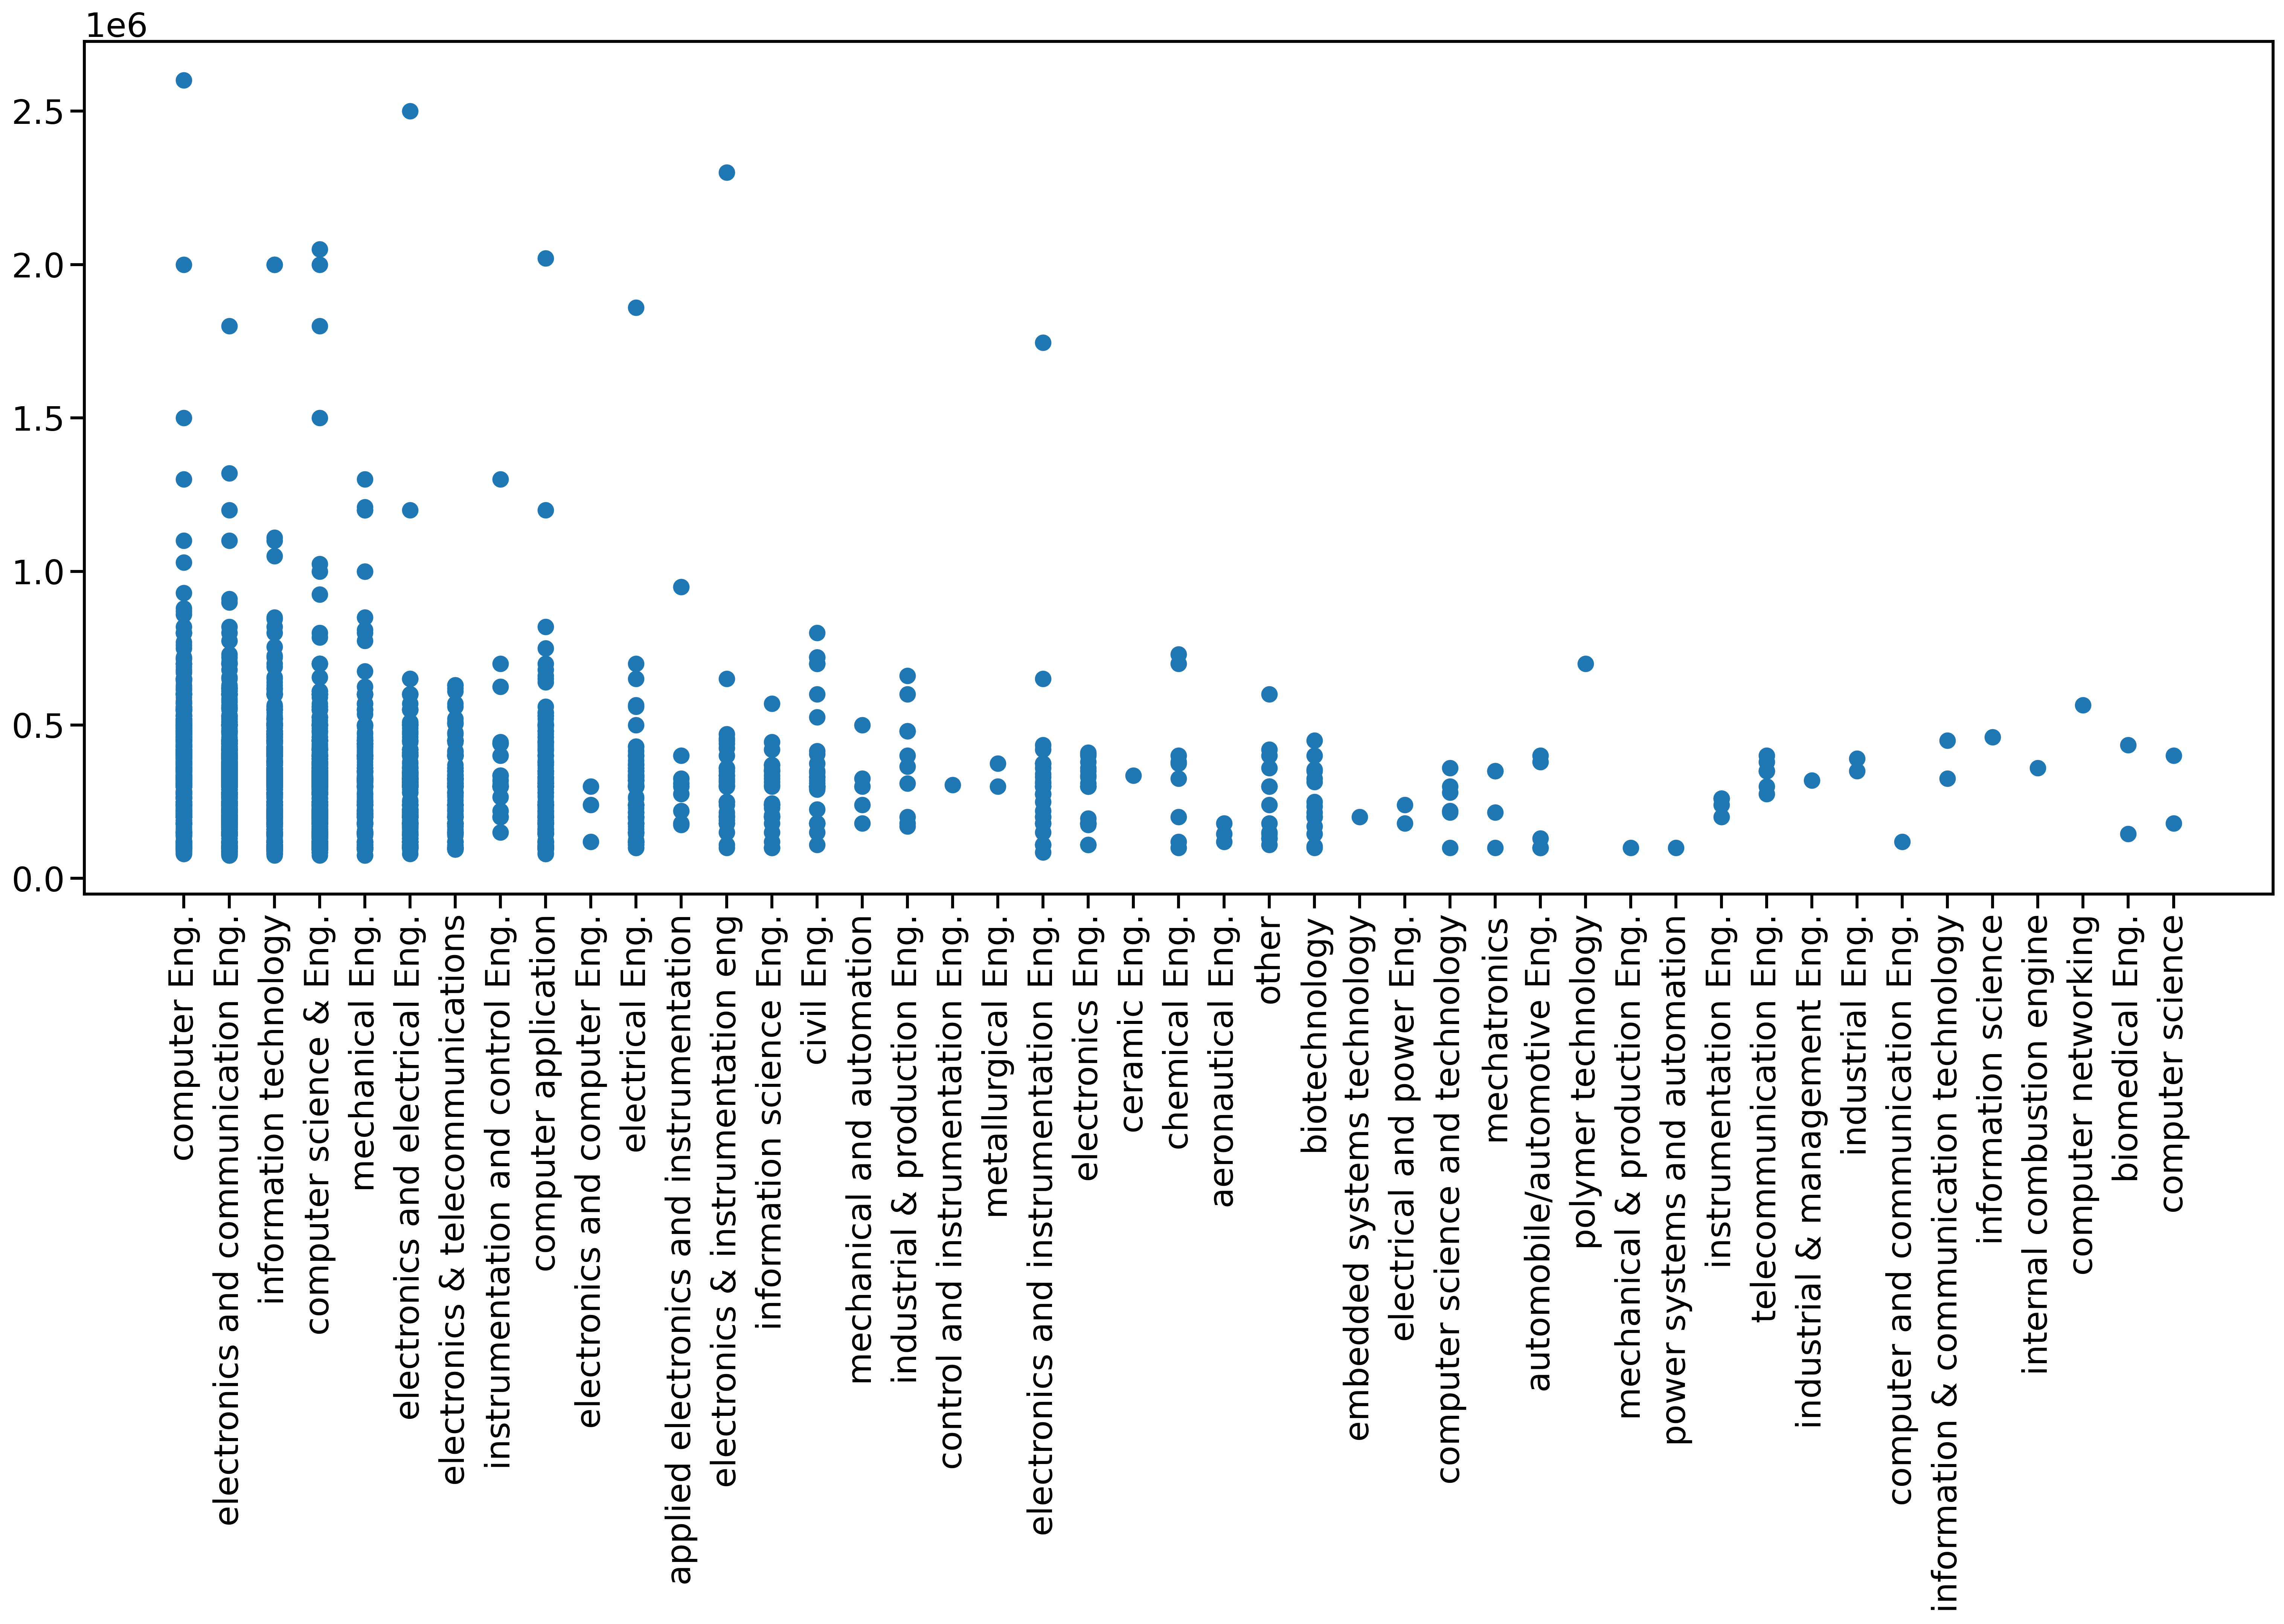

In [39]:
sns.set_context(context='talk', font_scale=1.3)
plt.figure(figsize=(25,10), dpi=300)
plt.scatter(y=df2.Salary,x=df2.Specialization)
plt.xticks(rotation=90)
plt.show()

### Observation
- This chart shows us the range of how much each specialization field Salary is
- We observe that the highest paid candidates are specialized in **Computer Eng** , **Electronics and Electrical Eng** and **Electronics and Instrumental Eng.** with Salary more than _20(LPA)_
- Some candidates who specialize in **mechanical and production Eng** and **Power System and automation** seem to be earning less than other specializations comparatively 

---

In [40]:
df2.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'Degree', 'Specialization',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'collegeGPA', 'Age'],
      dtype='object')

In [41]:
df2.replace(to_replace=[-1, 'NaN'], value=np.nan, inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [42]:
df2['AvgAmcat']=(df2[['English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience']]).sum(axis=1)/16
#Taking the average of AMCAT scores

<ipython-input-42-55b64ab09965>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AvgAmcat']=(df2[['English', 'Logical', 'Quant', 'Domain',


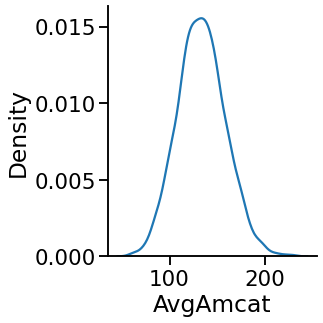

In [43]:
sns.displot(data=df2,x=df2.AvgAmcat,kind="kde")
plt.show()

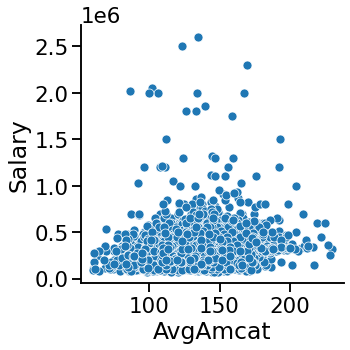

In [44]:
sns.relplot(data=df2,y=df2.Salary,x=df2.AvgAmcat)
plt.show()

#### Observation
- The candidates who scored an average of around **150** seem to be earning relativel more
- Some candidates who scored and average of around **200** are earning less than candidates who scored 150 

# Age Analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


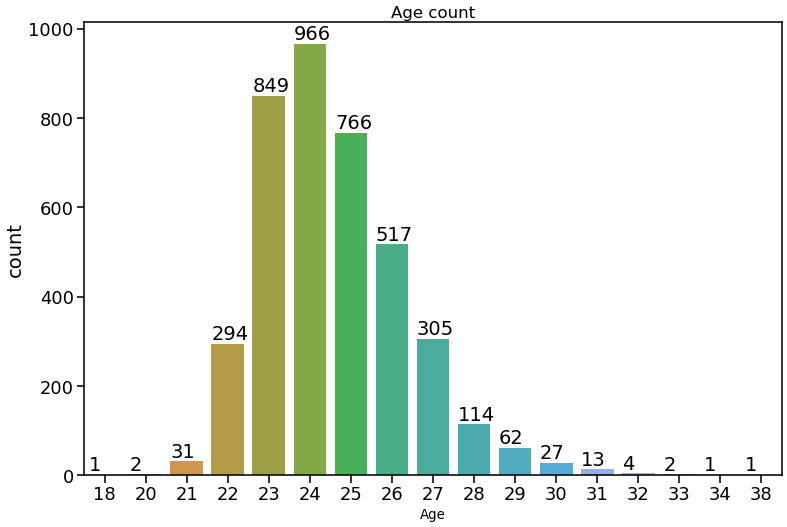

In [45]:
plt.figure(figsize=(15, 10),dpi=60)
ax = sns.countplot(df2.Age)
plt.xlabel('Age',fontsize=16)
plt.title('Age count',fontsize=20)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))
plt.show()

### Observations
- **8.29%** of candidates appearing for AMCAT are undergrduates
- **64.9%** of candiate have complete B.E/BTech and are appearing for AMCAT early in there carrer 
- **13.37%** of candidates are attempting AMCAT in there lates 20's

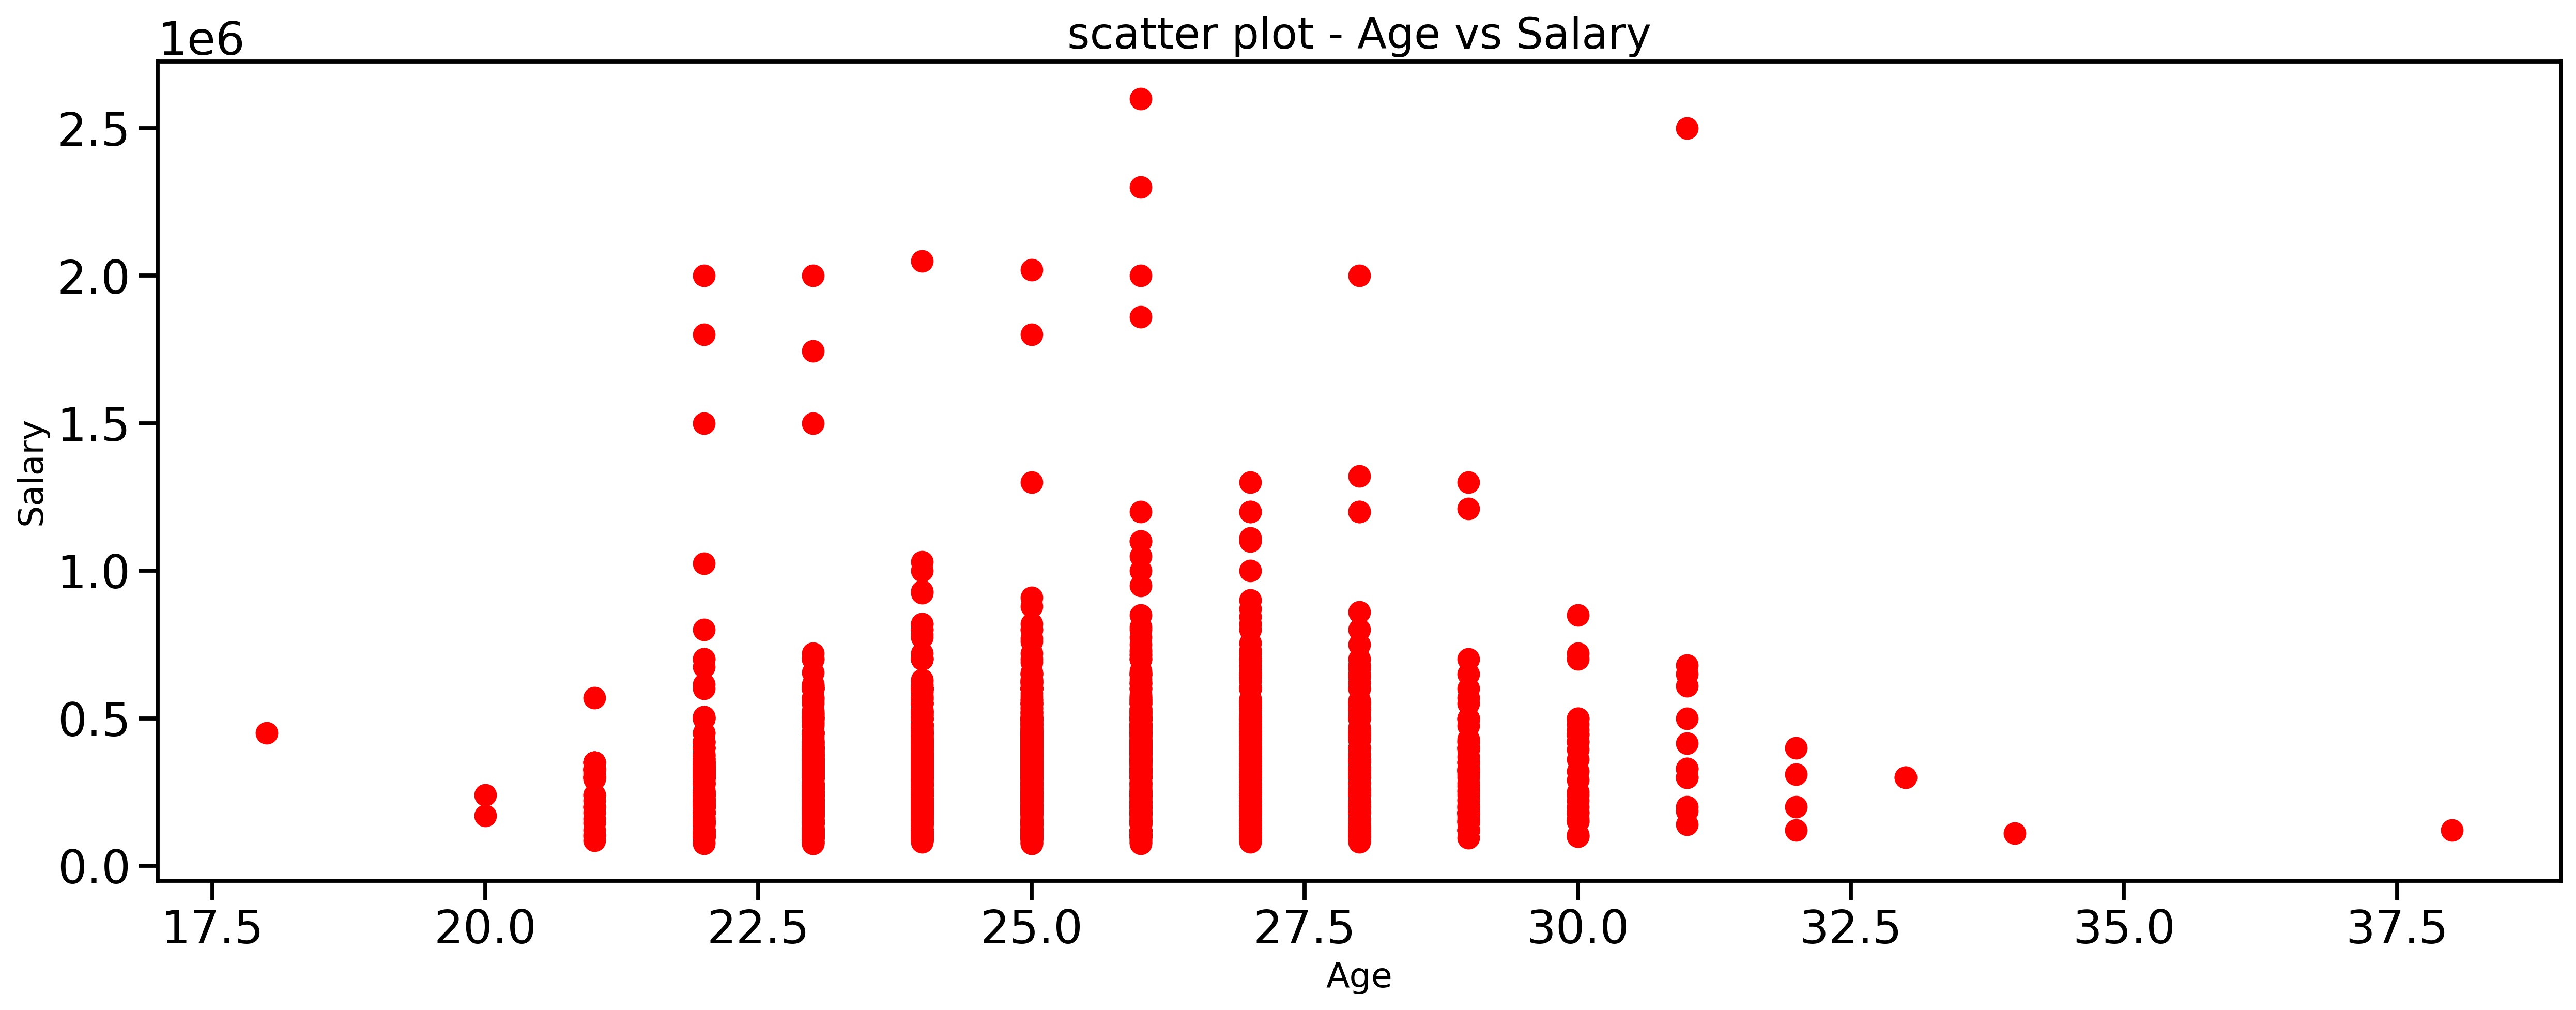

In [46]:
plt.figure(figsize=(20,7), dpi=300)
plt.scatter(df2.Age,df2.Salary,c='red')
plt.xlabel('Age',fontsize=16)
plt.ylabel('Salary',fontsize=16)
plt.title('scatter plot - Age vs Salary',fontsize=20)
plt.show()

### Observation
- Candidates between the age of **25** an **27** are earning the highest
- Candidates who are **32+** have lowest Salary
- Some in there **early 20's** are earning almost _5LPA_

In [47]:
df2.corr()

,Salary,10percentage,12graduation,12percentage,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,collegeGPA,Age,AvgAmcat
Salary,1.000000,0.205785,-0.171270,0.193553,-0.010955,0.191982,0.194198,0.261395,0.190443,0.192892,...,0.116729,0.215746,-0.060468,0.063528,-0.003865,-0.055658,-0.011548,0.182591,0.158950,0.184846
10percentage,0.205785,1.000000,0.269385,0.645153,-0.013841,0.349245,0.316503,0.316708,0.153369,0.170016,...,0.121440,0.172495,0.065518,0.136966,-0.005098,-0.132482,0.037170,0.344604,-0.243620,0.354233
12graduation,-0.171270,0.269385,1.000000,0.260286,0.014260,0.149922,0.108108,0.003306,-0.035827,-0.001371,...,0.078724,0.005901,0.103243,0.041091,0.061073,-0.073710,-0.015153,0.095016,-0.871904,0.206958
12percentage,0.193553,0.645153,0.260286,1.000000,-0.012905,0.213464,0.244597,0.313313,0.166039,0.152191,...,0.190921,0.025853,0.058538,0.105544,-0.006441,-0.091834,0.006966,0.392138,-0.267578,0.307200
GraduationYear,-0.010955,-0.013841,0.014260,-0.012905,1.000000,-0.024112,-0.024027,-0.021748,-0.009210,0.049303,...,0.046916,0.112761,-0.013371,-0.002796,0.008475,-0.000428,0.017181,0.010620,-0.025469,-0.004638
English,0.191982,0.349245,0.149922,0.213464,-0.024112,1.000000,0.443719,0.372782,0.227906,0.305912,...,0.130640,0.223291,0.030428,0.192541,0.014847,-0.154547,0.063561,0.114954,-0.103076,0.573174
Logical,0.194198,0.316503,0.108108,0.244597,-0.024027,0.443719,1.000000,0.501982,0.321929,0.437325,...,0.190769,0.248260,0.025645,0.169325,-0.007436,-0.179808,0.049397,0.212495,-0.101700,0.590226
Quant,0.261395,0.316708,0.003306,0.313313,-0.021748,0.372782,0.501982,1.000000,0.348546,0.414646,...,0.178304,0.335313,-0.006894,0.103250,-0.031521,-0.129865,0.020074,0.244478,-0.033130,0.623756
Domain,0.190443,0.153369,-0.035827,0.166039,-0.009210,0.227906,0.321929,0.348546,1.000000,0.581539,...,0.231676,0.788112,-0.012137,0.094886,-0.030449,-0.100700,0.019768,0.203800,0.027679,0.414742
ComputerProgramming,0.192892,0.170016,-0.001371,0.152191,0.049303,0.305912,0.437325,0.414646,0.581539,1.000000,...,0.186382,0.003191,-0.011451,0.130530,-0.029535,-0.140708,0.035884,0.247691,-0.006674,0.448039


# Analysis based  on Gender

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


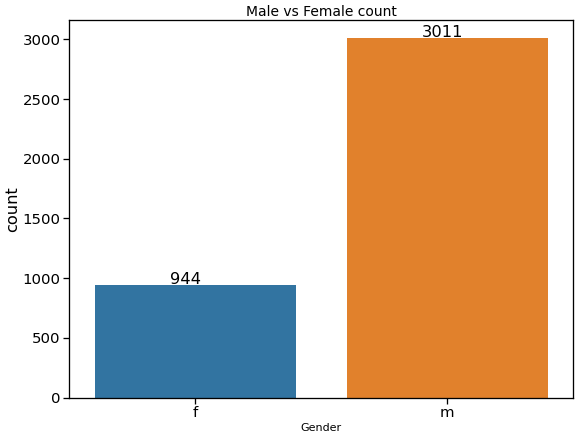

In [48]:
plt.figure(figsize=(13, 10),dpi=50)
ax = sns.countplot(df2.Gender)
plt.xlabel('Gender',fontsize=16)
plt.title('Male vs Female count',fontsize=20)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

### Observation
- **76.2%** of candidates appearing for AMCAT are male
- **23.8%** of candidates appearing for AMCAT are females

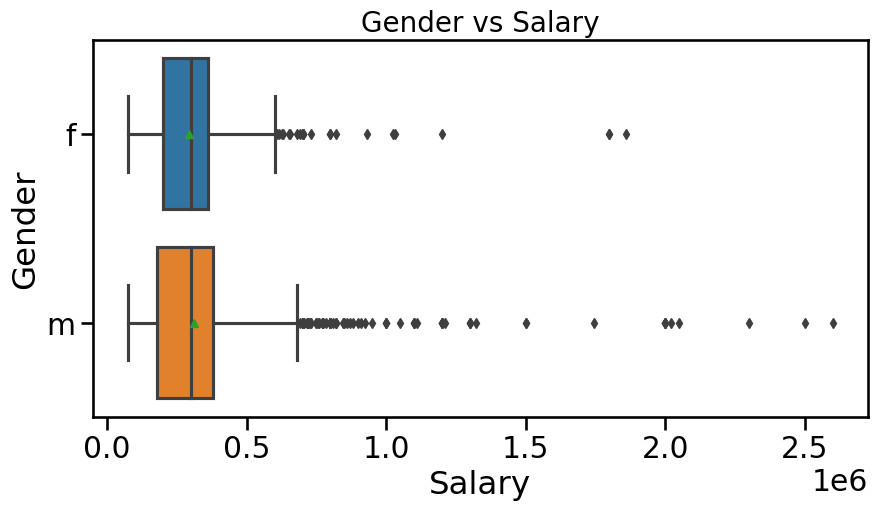

In [49]:
plt.figure(figsize=(10, 5),dpi=100)
sns.boxplot(x = df2.Salary, y = df2.Gender,showmeans=True)#,sym=''
plt.title('Gender vs Salary',fontsize=20)
plt.show()

### Observations
- We observe that while the salary for the 25 to 75% of candidates for both the genders are similar there are some that are earning more than 15LPA
- Lets focus on the Average now

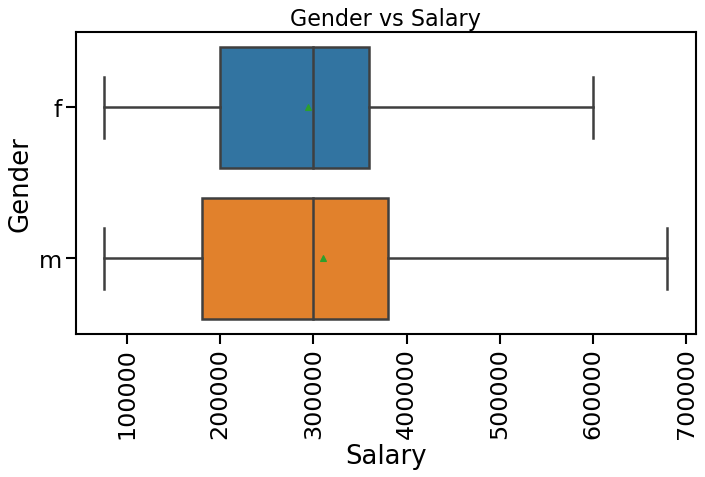

In [50]:
plt.figure(figsize=(10, 5),dpi=80)
sns.boxplot(x = df2.Salary, y = df2.Gender,showmeans=True,sym="")#,sym=''
plt.title('Gender vs Salary',fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Observation
- We see that both the genders have similar average salary of around **3LPA**
- **25%** of Male candidates have less salary compared to **25%** of female candidates
- **75%** of Female candidates have less salary compared to **75%** of male candidates


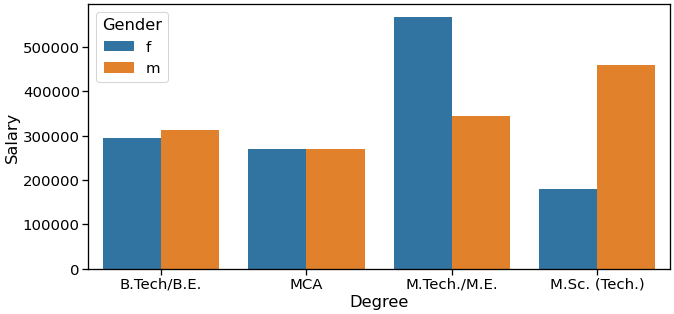

In [51]:
sns.set_context(context='talk', font_scale=1.3)
plt.figure(figsize=(15,7), dpi=50)
sns.barplot(y='Salary', x='Degree',hue='Gender',ci=None,data=df2)
plt.show()

### Observation
- Male candidates who have done B.Tech/B.E have slightly higher salary comparatevely
- Both the genders are almost equally paid who have pursue degree in MCA
- Female candidates are highly paid than male candidates who have done M.Tech/M.E
- Male candidates are highly paid than female candidates who have done M.Sc

---

# Analysis based on City

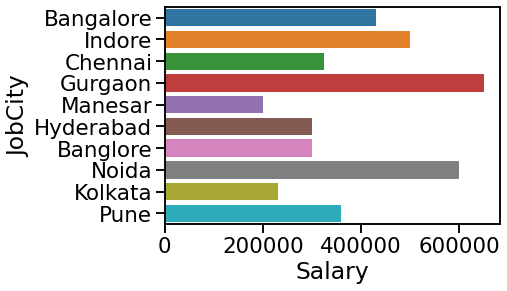

In [137]:
sns.barplot(x=df['Salary'].head(15),y=df['JobCity'].head(15),data=df2,ci=None)
plt.show()

### Observation
- **Gurgaon** is the city with the highest paid salary followed by **Noida** and **Indore**
- **Manesar** and **Kolkata** are paying comparatively the least among the rest of the cities 

In [136]:
# # #Example : Create a figure having 4 subplots
# x = np.linspace(1 ,10 ,100)

# #subplot 1 
# plt.figure(figsize=(15,7),dpi=100)
# plt.subplot(1 , 2 , 1) #Here the graph will be of 2 rows and 2 coloums and of the position 1
# sns.barplot(x=df['Salary'].head(15),y=df['English'],data=df,ci=None)
# plt.xticks(rotation=90)
# plt.show()


# #subplot 2
# plt.figure(figsize=(15,7),dpi=100)
# plt.subplot(1 , 2 , 2) #Here the graph will be of 2 rows and 2 coloums and of the position 2
# sns.barplot(x=df['Salary'].head(15),y=df['Logical'],data=df,ci=None)
# plt.xticks(rotation=90)
# plt.show()

# #subplot 3
# plt.figure(figsize=(15,7),dpi=100)
# plt.subplot(1 , 3 , 3) #Here the graph will be of 2 rows and 2 coloums and of the position 3
# sns.barplot(x=df['Salary'].head(15),y=df['Quant'],data=df,ci=None)
# plt.xticks(rotation=90)
# plt.show()

# #subplot 4
# plt.figure(figsize=(15,7),dpi=100)
# plt.subplot(1 , 4 , 4) #Here the graph will be of 2 rows and 2 coloums and of the position 4
# sns.barplot(x=df['Salary'].head(15),y=df['agreeableness'],data=df,ci=None)
# plt.xticks(rotation=90)
# plt.show()


---

### **Final Conclusions**

- Highest paid candidates are specialized in Computer Eng , Electronics and Electrical Eng and Electronics and Instrumental Eng.
- Scoring the highest in AMCAT may not necessarily mean you get paid more.
- Some Candidates between the age of 25 and 27 already are earning pretty good.
- While the salary is the same for undergraduate irrespective of the gender Females who did M.Tech are getting paid higher than Males and Males with M.Sc are getting paid more than Females with the same Degree
- Top 3 paid cities in India are in North